In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_excel(
    'https://github.com/pierretd/investor-classifier/blob/master/Part%202/investor_data.xlsx?raw=true'
)

df.sample(5)



,Unnamed: 0,GET STARTED,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,NOTE,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
13,NaN,NaN,NaN,START BALANCE,END BALANCE,NaN,NaN,NaN,Saved this month,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,NaN,Debt,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Try not to alter cells that contain a formula.,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df = pd.read_excel('https://github.com/pierretd/investor-classifier/blob/master/Part%202/investor_data.xlsx?raw=true', sheetname='investor_data')
df.sample(5)

/usr/local/lib/python3.6/dist-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,lender,commit,deal_size,invite,rating,int_rate,covenants,total_fees,fee_share,prior_tier,invite_tier
2607,Ipanema Investments,Decline,700.0,100.0,2.0,Below,2.0,41.0,0.9,Bookrunner,Bookrunner
3361,Damiba Investment Group,Commit,1600.0,220.0,2.0,Market,2.0,149.0,33.5,Bookrunner,Bookrunner
3302,Damiba Investment Group,Decline,1600.0,120.0,9.0,Below,0.0,25.0,3.8,Bookrunner,Participant
1464,Bank of Pepperoni Pizza,Decline,900.0,100.0,2.0,Market,2.0,102.0,15.6,Bookrunner,Participant
1089,Bank of Pepperoni Pizza,Commit,1100.0,160.0,5.0,Market,1.0,150.0,12.8,Participant,Bookrunner


In [0]:
df = pd.read_excel('https://github.com/pierretd/investor-classifier/blob/master/Part%202/investor_data.xlsx?raw=true', sheet_name='investor_data')
df.sample(5)

,lender,commit,deal_size,invite,rating,int_rate,covenants,total_fees,fee_share,prior_tier,invite_tier
6497,Bank of Beef and Broccoli,Commit,1300.0,240.0,10.0,Market,0.0,112.0,41.6,Bookrunner,Bookrunner
6375,Bank of Beef and Broccoli,Commit,500.0,100.0,2.0,Below,2.0,71.0,16.0,Bookrunner,Bookrunner
602,Bank of Pepperoni Pizza,Commit,1500.0,180.0,7.0,Market,0.0,171.0,20.7,Bookrunner,Bookrunner
4496,Cold Cut Credit,Commit,400.0,70.0,1.0,Market,2.0,43.0,11.8,Bookrunner,Bookrunner
297,Bank of Pepperoni Pizza,Commit,1500.0,250.0,2.0,Below,1.0,61.0,9.8,Participant,Bookrunner


In [0]:
rvlvr = df.copy(deep=True) #  Syndicated Revolver = rlvlr

In [0]:
print('Syndicated Revolver data set has {} features and {} degrees of freedom.'.format(df.shape[1], df.shape[0]))

Syndicated Revolver data set has 11 features and 7290 degrees of freedom.


In [0]:
rvlvr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7290 entries, 0 to 7289
Data columns (total 11 columns):
lender         7290 non-null object
commit         7289 non-null object
deal_size      7289 non-null float64
invite         7289 non-null float64
rating         7289 non-null float64
int_rate       7289 non-null object
covenants      7289 non-null float64
total_fees     7289 non-null float64
fee_share      7289 non-null float64
prior_tier     7289 non-null object
invite_tier    7289 non-null object
dtypes: float64(6), object(5)
memory usage: 626.6+ KB


In [0]:
rvlvr.select_dtypes(float).nunique()

deal_size      25
invite         54
rating         10
covenants       4
total_fees    312
fee_share     724
dtype: int64

In [0]:
df.describe()

,deal_size,invite,rating,covenants,total_fees,fee_share
count,7289.000000,7289.000000,7289.000000,7289.000000,7289.000000,7289.000000
mean,1039.237207,156.811634,4.043353,1.353409,108.086706,16.426657
std,449.056542,81.632713,2.621480,0.872310,71.442019,16.375238
min,200.000000,0.000000,1.000000,0.000000,-62.000000,-25.700000
25%,700.000000,100.000000,2.000000,1.000000,57.000000,5.100000
50%,1000.000000,150.000000,3.000000,2.000000,95.000000,11.700000
75%,1300.000000,210.000000,6.000000,2.000000,144.000000,22.700000
max,2600.000000,530.000000,10.000000,3.000000,711.000000,230.400000


In [0]:
rvlvr.select_dtypes(object).nunique()

lender         6
commit         2
int_rate       3
prior_tier     2
invite_tier    2
dtype: int64

In [0]:
rvlvr.lender.unique()

array(['Bank of Pepperoni Pizza', 'Ipanema Investments',
       'Damiba Investment Group', 'investor', 'Cold Cut Credit',
       'Bank of Beef and Broccoli'], dtype=object)

In [0]:
rvlvr.commit.unique()

array(['Commit', 'Decline', nan], dtype=object)

In [0]:
mapping = {'Commit':1, 'Decline':0}
rvlvr['commit'] = rvlvr['commit'].replace(mapping).astype(np.float64)


In [0]:
rvlvr.commit.unique()

array([ 1.,  0., nan])

In [0]:
rvlvr.prior_tier.unique()

array(['Bookrunner', 'Participant', nan], dtype=object)

In [0]:
df.invite_tier.unique() 

array(['Bookrunner', 'Participant', nan], dtype=object)

In [0]:
mapping2 = {'Bookrunner':1, 'Participant':0}
rvlvr['prior_tier'] = rvlvr['prior_tier'].replace(mapping2).astype(np.float64)
rvlvr['invite_tier'] = rvlvr['invite_tier'].replace(mapping2).astype(np.float64)

In [0]:
rvlvr.prior_tier.unique()

array([ 1.,  0., nan])

In [0]:
rvlvr.invite_tier.unique() 

array([ 1.,  0., nan])

In [0]:
rvlvr.int_rate.unique() 

array(['Market', 'Below', 'Above', nan], dtype=object)

In [0]:
mapping3 = {'Above':2, 'Below':0, 'Market': 1}
rvlvr['int_rate'] = rvlvr['int_rate'].replace(mapping3).astype(np.float64)

In [0]:
rvlvr.int_rate.unique() 

array([ 1.,  0.,  2., nan])

In [0]:

rvlvr.head()


,lender,commit,deal_size,invite,rating,int_rate,covenants,total_fees,fee_share,prior_tier,invite_tier
0,Bank of Pepperoni Pizza,1.0,900.0,130.0,3.0,1.0,2.0,98.0,24.4,1.0,1.0
1,Bank of Pepperoni Pizza,1.0,600.0,90.0,2.0,0.0,1.0,25.0,3.6,1.0,1.0
2,Bank of Pepperoni Pizza,1.0,1200.0,240.0,1.0,0.0,2.0,79.0,26.5,1.0,1.0
3,Bank of Pepperoni Pizza,1.0,1800.0,470.0,3.0,0.0,3.0,711.0,230.4,1.0,1.0
4,Bank of Pepperoni Pizza,1.0,400.0,80.0,3.0,1.0,2.0,50.0,11.0,1.0,1.0


In [0]:
rvlvr.shape

(7289, 11)

In [0]:
rvlvr.corr()

,commit,deal_size,invite,rating,int_rate,covenants,total_fees,fee_share,prior_tier,invite_tier
commit,1.000000,0.129916,0.332658,0.062359,0.081290,-0.018408,0.198940,0.233065,-0.184793,0.601506
deal_size,0.129916,1.000000,0.827683,0.498521,-0.000204,-0.452838,0.653168,0.428770,-0.001310,-0.012725
invite,0.332658,0.827683,1.000000,0.403975,0.001161,-0.372673,0.545094,0.470552,0.003078,0.356535
rating,0.062359,0.498521,0.403975,1.000000,0.019344,-0.814344,0.360836,0.243692,0.010389,-0.012817
int_rate,0.081290,-0.000204,0.001161,0.019344,1.000000,-0.011436,0.016552,0.021550,0.017645,-0.002945
covenants,-0.018408,-0.452838,-0.372673,-0.814344,-0.011436,1.000000,-0.102085,-0.072474,-0.006274,-0.000899
total_fees,0.198940,0.653168,0.545094,0.360836,0.016552,-0.102085,1.000000,0.653959,-0.004330,-0.000786
fee_share,0.233065,0.428770,0.470552,0.243692,0.021550,-0.072474,0.653959,1.000000,0.117897,0.056695
prior_tier,-0.184793,-0.001310,0.003078,0.010389,0.017645,-0.006274,-0.004330,0.117897,1.000000,0.002252
invite_tier,0.601506,-0.012725,0.356535,-0.012817,-0.002945,-0.000899,-0.000786,0.056695,0.002252,1.000000


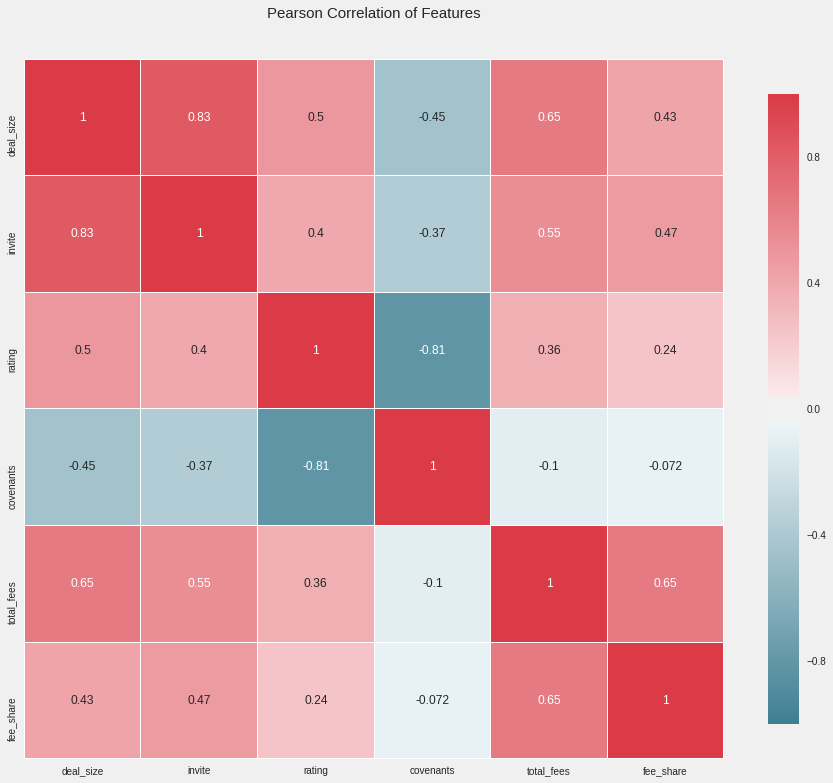

In [0]:
def correlation_heat(rvlvr):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    
correlation_heat(rvlvr[["commit", "deal_size", "invite", "rating", 
                        "int_rate", "covenants" ,"total_fees", "prior_tier", 
                        "invite_tier"
]])


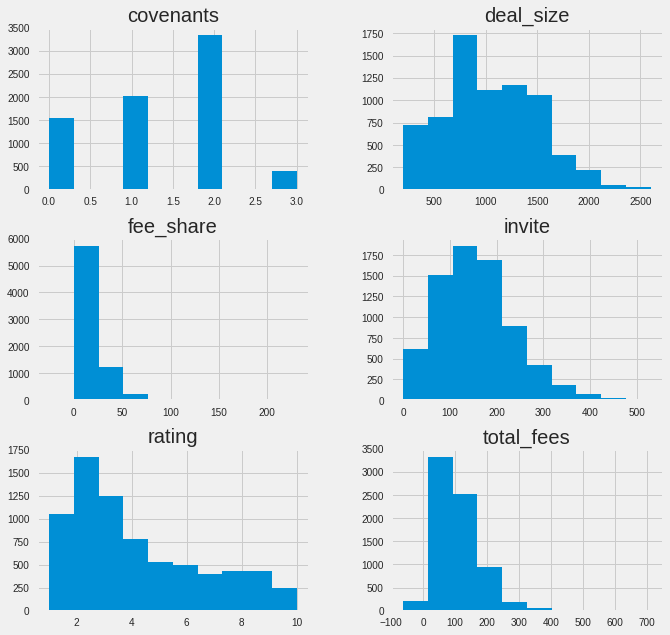

In [0]:
plt.style.use('fivethirtyeight')
df.hist(figsize=(10,10));
plt.show();

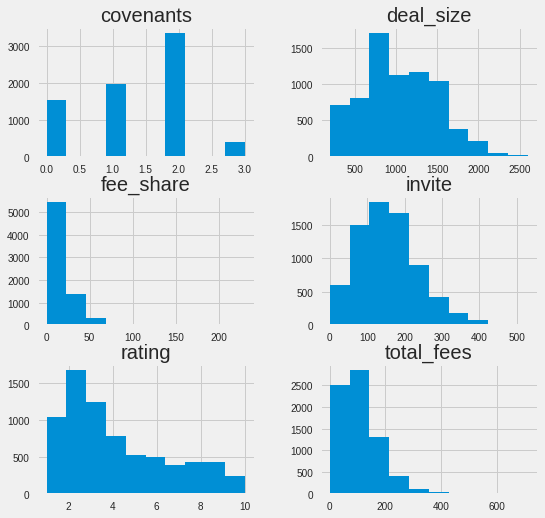

In [0]:
df = df[df.total_fees>0]
df.hist(figsize=(8,8))
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


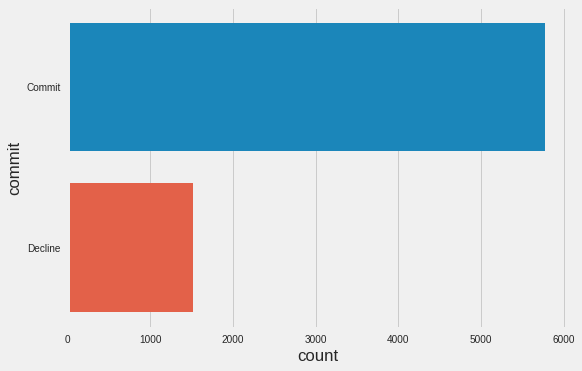

In [0]:
sns.countplot(y='commit', data=df)
plt.show()

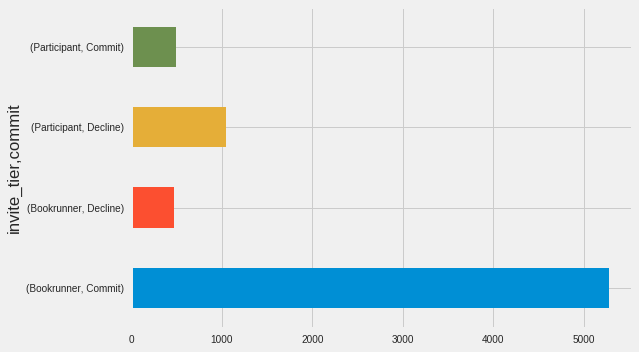

In [0]:
df.groupby('invite_tier').commit.value_counts().plot(kind='barh')
plt.show()